# Cargar Dataset

## 1.Inicializando Librerías

Para realizar nuestro trabajo utilizaremos las siguientes librerias:
Usaremos Numpy para poder utilizar su estrutura de arreglos; con Matplotlib gráficaremos cuadros que nos sirvan para demostrar las hipotesis planteadas en primera instancia. Por último utilizaremps pandas para poder leer el dataset entregado por el trabajo, y para utilizar su estrutura de dataframes.

In [109]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

## 2.Lectura del Dataset

El trabajo propuesto por el curso de machine learning nos plantea entrenar un modelo con data histórica de desembolsos de prestamos de un banco  para así poder apoyar al banco en la predicción de los desembolsos. Para ello se nos entrego un dataset con las siguientes variables:

    idPrestamo: Identificador de Préstamo
    target: indica si la persona cayó en mora (1) o cumplió con los pagos (0)
    monthly_debt_capacity: capacidad de endeudamiento mensual
    var_employment_time_in_months: cuantos meses seguidos lleva trabajando en su trabajo actual
    approved_amount: monto solicitado
    approved_term: cuotas solicitada
    sapproved_interest_amount: interés total a pagar
    var_net_income: salario
    person_gender: género
    credit_history_marital_status: estado civil
    var_max_sbs_qual_12m: si ha estado categorizado en la SBS en los últimos 12 meses
    person_degree_type_desc: nivel de educación
    default_request_term: si escogió el número de cuotas ofrecida (1)
    default_request_amount: si escogió el monto de dinero ofrecido (1)


In [110]:
df = pd.read_csv('datos_banco.csv', encoding = "ISO-8859-1")

Una vez hayamos cargado el dataset, procedemos a visualizar los datos.

# 1. Análisis Exploratorio y Tratamiento de Datos

## 1.1 - Visualizacion Corta del Dataframe
Lo primero que se decicio hacer fue ver el estado del dataframe, por lo que usamos la funcion head() de pandas. Se puede visualizar todas las columnas, y las primeras 5 filas.

In [111]:
df.head(5)

,idPrestamo,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,person_gender,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc,default_request_term,default_request_amount
0,LIBDISP9832897855,1,252.39,9.0,"1,200",6,289.11,1140.125000,MALE,C,NORMAL,Secundaria,1,0
1,LIBDISP9021501745,1,244.57,50.0,"2,200",12,696.15,1061.375000,FEMALE,S,NORMAL,Secundaria,0,0
2,LIBDISP4057314971,0,491.5,64.0,"1,000",3,84.99,2082.196667,FEMALE,S,NORMAL,Secundaria,0,0
3,LIBDISP8375185888,0,848.65,77.0,"1,500",6,221.53,3422.423333,MALE,S,NORMAL,Universitaria,0,0
4,LIBDISP9694463037,0,470.52,82.0,"1,000",3,91.34,1882.090000,FEMALE,S,NORMAL,Universitaria,1,0


## 1.2 - Magnitud de Dataset
Luego, para tener una idea de la magnitud del dataset con el que se esta trabajando, usamos la funcion shape() de Pandas para que nos retorne el numero de filas y columnas de dicho dataset. El primer axis son las filas y la segunda las columnas. 

In [112]:
df.shape

(1719, 14)

## 1.3 - Valores Nulos
Queriamos ver si existian valores nulos en el dataset que se va a usar, entonces usando la funcion isna(), mas sumando todo con sum(), podemos sumar la cantidad de valores nulos por cada columnas de DF. En este caso, podemos ver que la columna *var_employment_time_in_months* contiene 200 valores nulos.

In [113]:
df.isna().sum()

idPrestamo                         0
target                             0
monthly_debt_capacity              0
var_employment_time_in_months    200
approved_amount                    0
approved_term                      0
approved_interest_amount           0
var_net_income                     0
person_gender                      0
credit_history_marital_status      0
var_max_sbs_qual_12m               0
person_degree_type_desc            0
default_request_term               0
default_request_amount             0
dtype: int64

## 1.4 - Tipos de Atributos 
Es muy importante, antes de empezar a trabajar con la data de un dataset, saber que tipos de atributos contiene. Para esto, se hizo uso de la funcion dtypes() de pandas, que , por cada columna, me retorna su tipo de dato.

In [114]:
df.dtypes

idPrestamo                        object
target                             int64
monthly_debt_capacity             object
var_employment_time_in_months    float64
approved_amount                   object
approved_term                      int64
approved_interest_amount          object
var_net_income                   float64
person_gender                     object
credit_history_marital_status     object
var_max_sbs_qual_12m              object
person_degree_type_desc           object
default_request_term               int64
default_request_amount             int64
dtype: object

Podemos ver que varias columnas estan en tipo Object, lo que nos dice que el dataset no esta listo para poder entrenarlo. Esto se arreglara posteriormente.

Para poder ver las estadisticas de las columnas numericas, se hizo uso de la funcion describe() de pandas una vez mas. Como podemos ver, solo toma en cuenta las columnas que estan en tipos numericos, es decir int o float. Tambien podemos ver que los rangos de estas variables no coinciden, lo que se tendra que arreglar posteriormente.

In [115]:
df.describe()

,target,var_employment_time_in_months,approved_term,var_net_income,default_request_term,default_request_amount
count,1719.000000,1519.000000,1719.000000,1719.000000,1719.000000,1719.0
mean,0.295521,33.979592,6.464805,2693.545884,0.507853,0.0
std,0.456409,26.889423,3.009842,1825.694773,0.500084,0.0
min,0.000000,-1.000000,1.000000,0.000000,0.000000,0.0
25%,0.000000,11.000000,6.000000,1750.000000,0.000000,0.0
50%,0.000000,26.000000,6.000000,2373.758333,1.000000,0.0
75%,1.000000,61.000000,6.000000,3075.133333,1.000000,0.0
max,1.000000,87.000000,12.000000,28587.000000,1.000000,0.0


Una vez mas, sabiendo que solo toma en cuenta las columnas que estan en tipos numericos, es decir int o float, decidimos ver los histogramas de las columnas con la funcion hist() de pandas para ver como se estan distribuyendo.

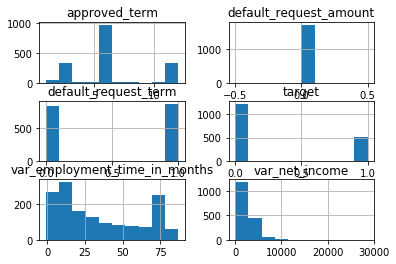

In [116]:
df.hist();

# 2.  Tratamiento de Datos

## 2.1.Descartamos variables / Feature Selection
En esta parte, posterior a la visualizacion de la data, procedemos a descartar variables del dataframe que no nos serán relevantes a la hora de entrenar el modelo. Estas variable son las siguientes: 

    person_gender: El genero no influye en la decision de otorgar un prestamo.
    person_degree_type_desc: El grado de estudios del cliente no es relevante.
    default_request_term: Contiene ...
    default_request_amount: Flag que indica si el cliente acepto el monto propuesto por el banco.

A su vez decidimos mantener las siguientes variables:

    idPrestamo: Id del Préstamo    
    monthly_debt_capacity: Indica la capacidad de endeudamiento del cliente.
    var_employment_time_in_months: Indica la tiempo que el cliente ha permanecido en un trabajo estable.
    approved_amount: Monto solicitado para el prestamo.
    approved_term: Numero de cuotas en las que se dividio el prestamo.
    sapproved_interest_amount: Interés que tendra que asumir el cliente por el prestamo.
    var_net_income: Salario actual del cliente, dinero con el que se pagara la deuda.
    credit_history_marital_status: Estado civil del cliente, podría ser relevante al poder asumir prestamos             conjuntos dentro de un nucleo familiar.
    var_max_sbs_qual_12m: Categoria que posee en la base de Riesgos de la SBS.

Finalmente, retiramos la columna *Target* del dataframe original, ya que esta columna será nuestro representa el dominio de cada prestamo. Es decir, si finalmente el cliente pudo cancelar el prestamo sin caer en moras.

In [117]:
x_df = df.drop(["target","person_gender","default_request_term","default_request_amount","person_degree_type_desc"], axis = 1)

y_df = df["target"]

print("shape of x_df = ", x_df.shape)
print("shape of y_df = ", y_df.shape)

shape of x_df =  (1719, 9)
shape of y_df =  (1719,)


Despues de haber retirado las columnas que consideramos irrelevante, usamos la funcion head() para poder visualizar como quedo el dataframe.

In [118]:
x_df.head(5)

,idPrestamo,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,credit_history_marital_status,var_max_sbs_qual_12m
0,LIBDISP9832897855,252.39,9.0,"1,200",6,289.11,1140.125000,C,NORMAL
1,LIBDISP9021501745,244.57,50.0,"2,200",12,696.15,1061.375000,S,NORMAL
2,LIBDISP4057314971,491.5,64.0,"1,000",3,84.99,2082.196667,S,NORMAL
3,LIBDISP8375185888,848.65,77.0,"1,500",6,221.53,3422.423333,S,NORMAL
4,LIBDISP9694463037,470.52,82.0,"1,000",3,91.34,1882.090000,S,NORMAL


## 2.2 Corrección de valores 
Dentro de la exploración pudimos identificar que todas las variables numericas eran percibidas como texto debido a que el separador de enteros y decimales era ',' . Por ello, en el siguiente codigo retiramos tal caracter para que nuestras varaibles sean efectivamente numéricas. Esto se hizo gracias a la funcion replace() y to_numeric() de pandas, conviertiendo cada columna a dato *FLOAT*.

In [119]:
x_df["monthly_debt_capacity"] = x_df["monthly_debt_capacity"].replace(',','', regex=True)
x_df["monthly_debt_capacity"] = pd.to_numeric(x_df["monthly_debt_capacity"], downcast="float")

x_df["approved_amount"] = x_df["approved_amount"].replace(',','', regex=True)
x_df["approved_amount"] = pd.to_numeric(x_df["approved_amount"], downcast="float")

x_df["approved_term"] = x_df["approved_term"].replace(',','', regex=True)
x_df["approved_term"] = pd.to_numeric(x_df["approved_term"], downcast="float")

x_df["approved_interest_amount"] = x_df["approved_interest_amount"].replace(',','', regex=True)
x_df["approved_interest_amount"] = pd.to_numeric(x_df["approved_interest_amount"], downcast="float")

x_df["var_employment_time_in_months"] = x_df["var_employment_time_in_months"].replace(',','', regex=True)
x_df["var_employment_time_in_months"] = pd.to_numeric(x_df["var_employment_time_in_months"], downcast="float")

x_df["var_net_income"] = x_df["var_net_income"].replace(',','', regex=True)
x_df["var_net_income"] = pd.to_numeric(x_df["var_net_income"], downcast="float")

x_df.head()

,idPrestamo,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,credit_history_marital_status,var_max_sbs_qual_12m
0,LIBDISP9832897855,252.389999,9.0,1200.0,6.0,289.109985,1140.125000,C,NORMAL
1,LIBDISP9021501745,244.570007,50.0,2200.0,12.0,696.150024,1061.375000,S,NORMAL
2,LIBDISP4057314971,491.500000,64.0,1000.0,3.0,84.989998,2082.196777,S,NORMAL
3,LIBDISP8375185888,848.650024,77.0,1500.0,6.0,221.529999,3422.423340,S,NORMAL
4,LIBDISP9694463037,470.519989,82.0,1000.0,3.0,91.339996,1882.089966,S,NORMAL


Ahora, si describimos nuestras variables podemos validar que estos sean numéricos.

In [120]:
x_df.describe()

,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income
count,1719.000000,1519.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,584.639282,33.979591,2136.998291,6.464805,407.184509,2693.547363
std,459.958984,26.889421,1504.947632,3.009831,407.703125,1825.694702
min,-158.750000,-1.000000,500.000000,1.000000,22.820000,0.000000
25%,350.760010,11.000000,1000.000000,6.000000,152.320007,1750.000000
50%,480.739990,26.000000,1500.000000,6.000000,281.390015,2373.758301
75%,660.820007,61.000000,2500.000000,6.000000,429.799988,3075.133423
max,7243.200195,87.000000,12200.000000,12.000000,2311.120117,28587.000000


A raiz de que ya contamos con nuestros datos en el formato adecuado, podemos efectuar una primera revisión y exploración de datos con todas las variables con su respectivo tipo de dato. A continuación presentamos gráficos que demuestran su distibución.

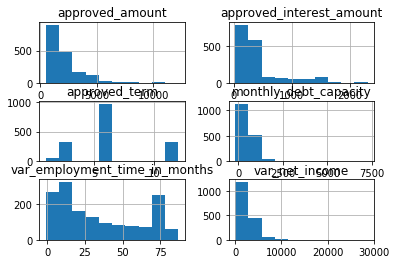

In [121]:
x_df.hist();


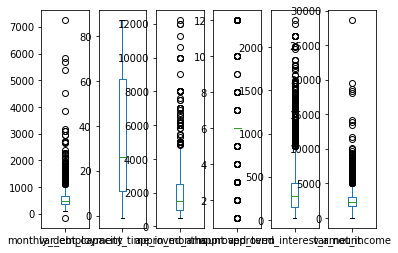

In [122]:
x_df.plot(kind='box', subplots=True);

## 2.3 - One hot encoding para columnas categóricas
Se analizo previamente que de hecho existian columnas con atributos *categoricos* en el dataframe. Debido a que estas columnas contienen informacion importante para el entrenamiento de nuestros modelos a usar, teniamos que encontrar la manera de convertirlas en valores numericos para que dichos modelos las entiendan. Entonces, decidimos usar la tecnica de *One Hot Encoding* , usando la funcion get_dummies() de pandas.

In [123]:
for i,id in enumerate(x_df["idPrestamo"]):
    x_df['idPrestamo'][i]=i

#check if theres that one step left / colab class
x_df = pd.concat([x_df,pd.get_dummies(df['credit_history_marital_status'], prefix='CHMS')],axis=1)
x_df.drop(['credit_history_marital_status'],axis=1, inplace=True)

x_df = pd.concat([x_df,pd.get_dummies(df['var_max_sbs_qual_12m'], prefix='VMSQ12')],axis=1)
x_df.drop(['var_max_sbs_qual_12m'],axis=1, inplace=True)


Luego , simplemente usamos head() para visualizar el estado del dataframe, y cada vez mas se esta poniendo mas listo para utilizar.

In [124]:
x_df.head(5)

,idPrestamo,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,CHMS_C,CHMS_D,CHMS_S,CHMS_V,VMSQ12_CPP,VMSQ12_DEFICIENTE,VMSQ12_DUDOSO,VMSQ12_NORMAL,VMSQ12_PERDIDA
0,0,252.389999,9.0,1200.0,6.0,289.109985,1140.125000,1,0,0,0,0,0,0,1,0
1,1,244.570007,50.0,2200.0,12.0,696.150024,1061.375000,0,0,1,0,0,0,0,1,0
2,2,491.500000,64.0,1000.0,3.0,84.989998,2082.196777,0,0,1,0,0,0,0,1,0
3,3,848.650024,77.0,1500.0,6.0,221.529999,3422.423340,0,0,1,0,0,0,0,1,0
4,4,470.519989,82.0,1000.0,3.0,91.339996,1882.089966,0,0,1,0,0,0,0,1,0


In [125]:
x_df.describe()

,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,CHMS_C,CHMS_D,CHMS_S,CHMS_V,VMSQ12_CPP,VMSQ12_DEFICIENTE,VMSQ12_DUDOSO,VMSQ12_NORMAL,VMSQ12_PERDIDA
count,1719.000000,1519.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,584.639282,33.979591,2136.998291,6.464805,407.184509,2693.547363,0.162885,0.007563,0.828970,0.000582,0.117510,0.018034,0.000582,0.861547,0.002327
std,459.958984,26.889421,1504.947632,3.009831,407.703125,1825.694702,0.369369,0.086659,0.376644,0.024119,0.322121,0.133112,0.024119,0.345475,0.048196
min,-158.750000,-1.000000,500.000000,1.000000,22.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,350.760010,11.000000,1000.000000,6.000000,152.320007,1750.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,480.739990,26.000000,1500.000000,6.000000,281.390015,2373.758301,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,660.820007,61.000000,2500.000000,6.000000,429.799988,3075.133423,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,7243.200195,87.000000,12200.000000,12.000000,2311.120117,28587.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2.4 - Reemplazamos Valores Faltantes
Como se analizo previamente, en la seccion de exploracion de datos, habia una columna que contenia 200 valores nulos. Para solucionar esto, como nos dimos cuenta que no habian muchos registros en el dataset, no decidimos descartar esas filas que contenian los valores nulos. Entonces, lo que decidimos hacer fue usar un SimpleImputer que reemplaza esos valores nulos por , en este caso, la media de esa columna.


Importamos SimpleImputer de *sklearn* y creamos un modelo imputer.

In [126]:
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(strategy = "mean")

Entrenamos este modelo con el nuestro dataset.

In [127]:
imputer_mean.fit(x_df)
columns = x_df.columns

In [128]:
imputer_mean.statistics_

array([8.59000000e+02, 5.84639483e+02, 3.39795918e+01, 2.13699825e+03,
       6.46480512e+00, 4.07185828e+02, 2.69354588e+03, 1.62885398e-01,
       7.56253636e-03, 8.28970332e-01, 5.81733566e-04, 1.17510180e-01,
       1.80337405e-02, 5.81733566e-04, 8.61547411e-01, 2.32693426e-03])

In [129]:
x_df = imputer_mean.transform(x_df)


In [130]:
x_df = pd.DataFrame(data=x_df,columns=columns)
x_df.isna().sum()

x_df.head()

,idPrestamo,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,CHMS_C,CHMS_D,CHMS_S,CHMS_V,VMSQ12_CPP,VMSQ12_DEFICIENTE,VMSQ12_DUDOSO,VMSQ12_NORMAL,VMSQ12_PERDIDA
0,0.0,252.389999,9.0,1200.0,6.0,289.109985,1140.125000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,244.570007,50.0,2200.0,12.0,696.150024,1061.375000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,491.500000,64.0,1000.0,3.0,84.989998,2082.196777,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,848.650024,77.0,1500.0,6.0,221.529999,3422.423340,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,470.519989,82.0,1000.0,3.0,91.339996,1882.089966,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## 2.5 - Definición de columna Idprestamo como Índices

In [131]:
x_df = x_df.set_index("idPrestamo")

## 2.6 - Normalización

In [132]:
import pandas as pd
from sklearn import preprocessing

normalizer = preprocessing.Normalizer().fit(x_df)
test =normalizer.transform(x_df)
columnsDF = x_df.columns
x_df = pd.DataFrame(data = test, columns = columnsDF)
x_df.head()

,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,CHMS_C,CHMS_D,CHMS_S,CHMS_V,VMSQ12_CPP,VMSQ12_DEFICIENTE,VMSQ12_DUDOSO,VMSQ12_NORMAL,VMSQ12_PERDIDA
0,0.148534,0.005297,0.706214,0.003531,0.170145,0.670977,0.000589,0.0,0.000000,0.0,0.0,0.0,0.0,0.000589,0.0
1,0.095828,0.019591,0.862010,0.004702,0.272767,0.415871,0.000000,0.0,0.000392,0.0,0.0,0.0,0.0,0.000392,0.0
2,0.207911,0.027073,0.423014,0.001269,0.035952,0.880798,0.000000,0.0,0.000423,0.0,0.0,0.0,0.0,0.000423,0.0
3,0.221058,0.020057,0.390723,0.001563,0.057705,0.891479,0.000000,0.0,0.000260,0.0,0.0,0.0,0.0,0.000260,0.0
4,0.215239,0.037511,0.457450,0.001372,0.041783,0.860962,0.000000,0.0,0.000457,0.0,0.0,0.0,0.0,0.000457,0.0


In [133]:
x_df.head(10)


,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,CHMS_C,CHMS_D,CHMS_S,CHMS_V,VMSQ12_CPP,VMSQ12_DEFICIENTE,VMSQ12_DUDOSO,VMSQ12_NORMAL,VMSQ12_PERDIDA
0,0.148534,0.005297,0.706214,0.003531,0.170145,0.670977,0.000589,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000589,0.0
1,0.095828,0.019591,0.862010,0.004702,0.272767,0.415871,0.000000,0.0,0.000392,0.0,0.000000,0.0,0.0,0.000392,0.0
2,0.207911,0.027073,0.423014,0.001269,0.035952,0.880798,0.000000,0.0,0.000423,0.0,0.000000,0.0,0.0,0.000423,0.0
3,0.221058,0.020057,0.390723,0.001563,0.057705,0.891479,0.000000,0.0,0.000260,0.0,0.000000,0.0,0.0,0.000260,0.0
4,0.215239,0.037511,0.457450,0.001372,0.041783,0.860962,0.000000,0.0,0.000457,0.0,0.000000,0.0,0.0,0.000457,0.0
5,0.167948,0.027035,0.513320,0.002053,0.075810,0.837743,0.000000,0.0,0.000342,0.0,0.000000,0.0,0.0,0.000342,0.0
6,0.094256,0.015615,0.879724,0.002639,0.244027,0.396739,0.000000,0.0,0.000220,0.0,0.000000,0.0,0.0,0.000220,0.0
7,0.215689,0.001332,0.399505,0.001998,0.096251,0.885779,0.000000,0.0,0.000333,0.0,0.000000,0.0,0.0,0.000333,0.0
8,0.221806,0.010856,0.287549,0.001917,0.047858,0.930433,0.000319,0.0,0.000000,0.0,0.000319,0.0,0.0,0.000000,0.0
9,0.077462,0.028473,0.369781,0.002219,0.056325,0.923728,0.000000,0.0,0.000370,0.0,0.000000,0.0,0.0,0.000370,0.0


Dropping the negative value that was in the column : monthly_debt_capacity

monthly_debt_capacity    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

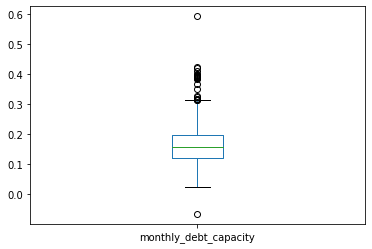

In [134]:
x_df["monthly_debt_capacity"].plot(kind='box', subplots=True)

# 3. Eleccion de Modelos a Utilizar

## 3.1 - K-Nearest Neighbors Model

## 3.2 - Decision Tree Model

## 3.3 - Logistic Regression Model

# 4. Validacion de Modelos

## 4.1 - Splitting dataset into 80-20/ HOLDOUT SETS

In [135]:
x_df.head()

,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,CHMS_C,CHMS_D,CHMS_S,CHMS_V,VMSQ12_CPP,VMSQ12_DEFICIENTE,VMSQ12_DUDOSO,VMSQ12_NORMAL,VMSQ12_PERDIDA
0,0.148534,0.005297,0.706214,0.003531,0.170145,0.670977,0.000589,0.0,0.000000,0.0,0.0,0.0,0.0,0.000589,0.0
1,0.095828,0.019591,0.862010,0.004702,0.272767,0.415871,0.000000,0.0,0.000392,0.0,0.0,0.0,0.0,0.000392,0.0
2,0.207911,0.027073,0.423014,0.001269,0.035952,0.880798,0.000000,0.0,0.000423,0.0,0.0,0.0,0.0,0.000423,0.0
3,0.221058,0.020057,0.390723,0.001563,0.057705,0.891479,0.000000,0.0,0.000260,0.0,0.0,0.0,0.0,0.000260,0.0
4,0.215239,0.037511,0.457450,0.001372,0.041783,0.860962,0.000000,0.0,0.000457,0.0,0.0,0.0,0.0,0.000457,0.0


In [136]:
splitIndex = int(x_df.shape[0]*0.8)
X_train = x_df.iloc[:splitIndex].to_numpy()
X_test = x_df.iloc[splitIndex:].to_numpy()

Y_train = y_df.iloc[:splitIndex].to_numpy()
Y_test = y_df.iloc[splitIndex:].to_numpy()

# Aplicación y Validación de Modelos 

## 1.K Nearest Neighbor

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=60)

In [138]:
knn.fit(X_train, Y_train)
y2_model = knn.predict(X_test)
accuracy_score(Y_test, y2_model)

0.7034883720930233

In [139]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, x_df,y_df, cv=20)

array([0.69767442, 0.70930233, 0.6627907 , 0.70930233, 0.6627907 ,
       0.68604651, 0.76744186, 0.69767442, 0.70930233, 0.73255814,
       0.73255814, 0.70930233, 0.73255814, 0.72093023, 0.73255814,
       0.72093023, 0.72093023, 0.74418605, 0.73255814, 0.69411765])

## 2.Decision Tree Model

In [140]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [141]:
#tree.plot_tree(clf);


In [142]:
y2_dtModel = clf.predict(X_test)

In [143]:

accuracy_score(Y_test, y2_dtModel)

0.625

In [144]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

cross_val_score(clf, X_train, Y_train, cv=20)
cvDT = cross_val_score(clf, x_df,y_df, cv=LeaveOneOut())
print(cvDT.mean())

0.6323443862710878


## 3.Logistic Regression

### Importamos la libreria

In [145]:
from sklearn.linear_model import LogisticRegression

### Instanciamos y entrenamos el modelo

In [146]:
clf_LR = LogisticRegression(random_state=0).fit(X_train, Y_train)

### Obtenemos el score

In [147]:
y_LRModel = clf_LR.predict(X_test)

clf_LR.score(X_test, Y_test)

0.7034883720930233

## 4.XGBoost

In [171]:
import xgboost as xgb
from xgboost import XGBClassifier
#dtrain = xgb.DMatrix(X_train,Y_train)
#dtest = xgb.DMatrix(X_test)

#modelXGB = XGBClassifier(learning_rate=0.1, n_estimators=190, max_depth=5, min_child_weight=2, objective="binary:logistic", subsample=0.9, colsample_bytree=0.8, seed=23333)

xg_model = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)


In [174]:
xg_model.fit(X_train,Y_train)

y_XGB = xg_model.predict(X_test)



[18:59:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [175]:
accuracy_score(Y_test, y_XGB)

0.6947674418604651

In [149]:
'''
params = {
    'n_estimators': 100,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'max_depth': 7,
    'min_child_weight': 1,
    'learning_rate': 0.1,
    'subsample': 0.8,    
    'eta': 0.2
}
'''


&quot;\nparams = {\n    &#39;n_estimators&#39;: 100,\n    &#39;colsample_bytree&#39;: 0.8,\n    &#39;objective&#39;: &#39;binary:logistic&#39;,\n    &#39;max_depth&#39;: 7,\n    &#39;min_child_weight&#39;: 1,\n    &#39;learning_rate&#39;: 0.1,\n    &#39;subsample&#39;: 0.8,    \n    &#39;eta&#39;: 0.2\n}\n&quot;

In [150]:
'''
model_xgb = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,
    nfold=5,
    early_stopping_rounds=100
)
'''

&#39;\nmodel_xgb = xgb.cv(\n    params=params,\n    dtrain=dtrain,\n    num_boost_round=500,\n    nfold=5,\n    early_stopping_rounds=100\n)\n&#39;

In [151]:
'''
num_round = 10
bst = xgb.train(params, dtrain, num_boost_round=len(model_xgb))
'''

&#39;\nnum_round = 10\nbst = xgb.train(params, dtrain, num_boost_round=len(model_xgb))\n&#39;

In [152]:
'''
from sklearn.metrics import f1_score

preds = bst.predict(dtest)

for i in range(len(preds)):
    if preds[i]<0.8:
      preds[i]=1
    else:
      preds[i]=0

f1 = f1_score(Y_test, preds)
print(f1)
'''

&#39;\nfrom sklearn.metrics import f1_score\n\npreds = bst.predict(dtest)\n\nfor i in range(len(preds)):\n    if preds[i]&lt;0.8:\n      preds[i]=1\n    else:\n      preds[i]=0\n\nf1 = f1_score(Y_test, preds)\nprint(f1)\n&#39;

# Resultados Finales


In [153]:
a1 = round((accuracy_score(Y_test, y2_model)*100),2)
a2 = round((accuracy_score(Y_test, y2_dtModel)*100),2)
a3 = round((clf_LR.score(X_test, Y_test)*100),2)
a4 = round((f1*100),2)


print("KNN accuracy: " + str(a1)+"%")
print("Decision Tree accuracy: " + str(a2)+"%")
print("Logistic Regression accuracy: " + str(a3)+"%")
print("XGBoost accuracy: " + str(a4)+"%")

KNN accuracy: 70.35%
Decision Tree accuracy: 62.5%
Logistic Regression accuracy: 70.35%
XGBoost accuracy: 48.12%


In [154]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
scoring = "neg_mean_squared_error"

results = []
names = []
kfold = KFold(n_splits=num_folds, random_state=1)



In [155]:
##### Decision Tree

cv_resultsDT = cross_val_score(clf,x_df,y_df, cv=kfold,scoring=scoring)
results.append(cv_resultsDT)
names.append("Decision Tree")

msg = "%s: %f (%f)" % (names[0], cv_resultsDT.mean(),cv_resultsDT.std())
print(msg)


Decision Tree: -0.376958 (0.019317)


In [156]:
##### Logistic Regression

cv_resultsLR = cross_val_score(clf_LR, x_df,y_df, cv=kfold,scoring=scoring)
results.append(cv_resultsLR)
names.append("Logistic Regression")

msg = "%s: %f (%f)" % (names[1], cv_resultsLR.mean(),cv_resultsLR.std())
print(msg)

Logistic Regression: -0.278091 (0.026491)


In [157]:
##### K Nearest Neighbor

cv_resultsKNN = cross_val_score(knn, x_df,y_df, cv=kfold,scoring=scoring)
results.append(cv_resultsKNN)
names.append("K Nearest Neighbor")

msg = "%s: %f (%f)" % (names[2], cv_resultsKNN.mean(),cv_resultsKNN.std())
print(msg)

K Nearest Neighbor: -0.289144 (0.023134)


In [177]:
##### XGBoost

cv_resultsXGB = cross_val_score(xg_model, x_df, y_df, cv=kfold,scoring=scoring)
results.append(cv_resultsXGB)
names.append("XGBoost")

msg = "%s: %f (%f)" % (names[3], cv_resultsXGB.mean(),cv_resultsXGB.std())
print(msg)

[19:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:17

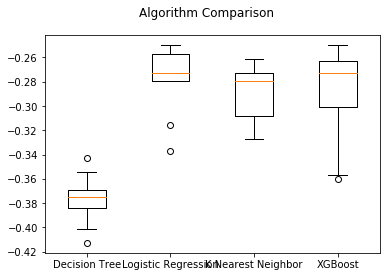

In [178]:
import matplotlib.pyplot as pyplot

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Conclusiones
